# Assignment 5 - Group 1

## Kaggle Submission ID: jennaguo

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import datetime

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Import & explore data

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [65]:
data['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [67]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
X_data=data.drop('label',axis=1)
y_data=data['label']

In [36]:
X_data.shape

(42000, 784)

In [37]:
y_data.shape

(42000,)

## 1. Fitting a Random Forest Classifier to train.csv

In [18]:
rnd_clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
start = datetime.datetime.now()
rnd_clf.fit(X_data,y_data)
end = datetime.datetime.now()
print(f'Random classifier took {end - start} seconds to run on raw data')

Random classifier took 0:00:35.538266 seconds to run on raw data


In [48]:
test_result=pd.DataFrame()
test_result['ImageId']=test_data.index+1
test_result['Label']=rnd_clf.predict(test_data).T
test_result.set_index('ImageId',inplace=True)
sub_rfc=test_result[['Label']]
sub_rfc.to_csv('submit_rfc.csv')

## 2. Perform PCA on the combined training and test set data together

In [7]:
# Combine the data set

full_data = X_data.append(test_data)

In [51]:
full_data.shape

(70000, 784)

In [8]:
# Generating principal components that represent 95 percent of the variability in the explanatory variables
start = datetime.datetime.now()
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(full_data)
end = datetime.datetime.now()
print(f'It took {end - start} seconds to identify the PCA')

It took 0:00:07.706441 seconds to identify the PCA


In [9]:
print('The Principal components count is: ', pca.n_components_)

The Principal components count is:  154


In [55]:
X_reduced.shape

(70000, 154)

In [19]:
X_reduced

array([[-6.75625509e+02, -6.82915808e+02,  1.86498640e+02, ...,
        -1.08990183e+01, -1.63219488e+01,  6.35662386e+01],
       [ 1.69062514e+03, -4.02068266e+02, -4.88585115e+02, ...,
        -2.65795542e+01, -7.82907326e+00, -4.27981864e+01],
       [-8.90131113e+02, -2.75559563e+02,  7.94427204e+01, ...,
         5.47651313e-01, -1.89874036e+01, -9.32970154e+00],
       ...,
       [-1.38405877e+02, -6.44818778e+02, -8.80688806e+02, ...,
         3.80328093e+01,  7.46148739e+00,  3.37243298e+01],
       [-4.94327683e+01,  5.78108995e+02, -3.23990494e+02, ...,
         1.21587393e+00,  3.78456029e+01,  1.25606721e+01],
       [ 5.97313126e+02,  1.41726610e+02,  8.18148548e+02, ...,
         7.73017610e+01,  4.81828624e+01,  6.94983715e+01]])

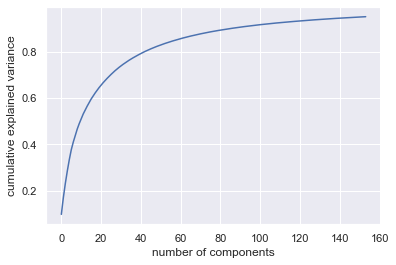

In [57]:
#Explained variance plot

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 3. Using the identified PC from above, use the train.csv to build another random forest classifier.

In [10]:
X_reduced_train = X_reduced[0:42000, :]
X_reduced_test = X_reduced[42000:70000, :]

In [11]:
X_reduced_train.shape

(42000, 154)

In [12]:
X_reduced_test.shape

(28000, 154)

In [17]:
## Here we have used train.csv data to build another random forest classifier and record the time along with accuracy.
rnd_clf2 = RandomForestClassifier(n_estimators = 100,random_state = 42)

start = datetime.datetime.now()
rnd_clf2.fit(X_reduced_train, y_data)
end = datetime.datetime.now()
print(f'Random classifier took {end - start} seconds to run on Test data using PCA')

Random classifier took 0:01:06.974443 seconds to run on Test data using PCA


In [71]:
test_result2=pd.DataFrame()
test_result2['ImageId']=test_data.index+1
test_result2['Label']=rnd_clf2.predict(X_reduced_test).T
test_result2.set_index('ImageId',inplace=True)
sub_pca=test_result2[['Label']]
sub_pca.to_csv('submit_pca.csv')

## 4. Submit both RF & PCA RF to Kaggle

RF Kaggle Score is: 0.96575,     Time: 35 sec \
PCA&RF Kaggle Score is: 0.94392,     Time: 1 min 3 sec \
**PCA reduced the data dimention so the score is lower and runtime is much slower. The reason is PCA converted data to floating numbers instead of integer.**

## 5. Identify design flaw  re-run experiment

The flaw in the experiement is the model used the full train.csv data, didn't go through train and test process.

In [20]:
# Split training data & extract labels

train_set, test_set = train_test_split(data, test_size=0.2, random_state = 42)
y_train = train_set['label']
X_train = train_set.drop('label', axis=1)
y_test = test_set['label']
X_test = test_set.drop('label', axis=1)

In [41]:
X_train.shape

(33600, 784)

In [42]:
X_test.shape

(8400, 784)

Random Forest

In [43]:
rnd_clf3 = RandomForestClassifier(n_estimators = 100,random_state = 42)
start = datetime.datetime.now()
rnd_clf3.fit(X_train,y_train)
end = datetime.datetime.now()
print(f'Random classifier took {end - start} seconds to run on raw data')

Random classifier took 0:00:26.264633 seconds to run on raw data


In [44]:
y_pred = rnd_clf3.predict(X_test)
accuracy_score(y_test,y_pred)

0.9628571428571429

In [45]:
test_result3=pd.DataFrame()
test_result3['ImageId']=test_data.index+1
test_result3['Label']=rnd_clf3.predict(test_data).T
test_result3.set_index('ImageId',inplace=True)
sub_rfc_revised=test_result3[['Label']]
sub_rfc_revised.to_csv('submit_rfc_revised.csv')

PCA and Random Forest

In [46]:
X_train_pca = X_reduced[0:33600, :]
X_test_pca = X_reduced[33600:42000, :]

In [47]:
start = datetime.datetime.now()
rnd_clf4 = RandomForestClassifier(n_estimators = 154, random_state = 42)
rnd_clf4.fit(X_train_pca, y_train)
end = datetime.datetime.now()
print(f'Random classifier took {end - start} seconds to run on Test data using PCA')

Random classifier took 0:02:18.554482 seconds to run on Test data using PCA


In [48]:
y_pred2 = rnd_clf4.predict(X_test_pca)
accuracy_score(y_test,y_pred2)

0.10726190476190477

In [49]:
test_result4=pd.DataFrame()
test_result4['ImageId']=test_data.index+1
test_result4['Label']=rnd_clf4.predict(X_reduced_test).T
test_result4.set_index('ImageId',inplace=True)
sub_pca_revised=test_result4[['Label']]
sub_pca_revised.to_csv('submit_pca_revised.csv')

## Submit two revised results to Kaggle
Revised RF Kaggle Score is: 0.96264,     Time: 26 sec \
Revised PCA&RF Kaggle Score is: 0.09478,     Time: 2 min 18 sec \

**By comparing both accuracy and runtime, we wouldn't choose PCA to reduce dimension.**

## 6.  k-means clustering to group MNIST observations into 1 of 10 categories & assign labels

In [147]:
#Manual method
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [149]:
X_representative_digits = X_train.iloc[representative_digit_idx]

In [151]:
representative_digit_idx

array([10646, 24572,  1648, 33496, 11605, 18773, 24356,  5853, 10376,
       24416, 10605,   530, 32683,  9735, 14238, 20591, 29388,  4873,
        2774, 29462,  2365, 15251,  1523, 24472,  8212, 12291, 19931,
       22841, 20242,  5039,  8749, 28213, 24228,  9124,   215,  1335,
       28429, 10377, 23150, 30848, 30165, 25923, 16884, 19568, 23549,
       18942,   117, 22344, 10442, 31446], dtype=int64)

In [152]:
def convertImage(dfrow):
    image = np.array(X_train.iloc[dfrow], dtype='float').reshape((28,28))
    return image

In [153]:
images = []
for digit in representative_digit_idx:
    image = convertImage(digit)
    images.append(image)

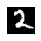

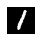

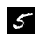

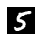

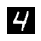

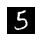

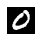

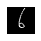

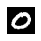

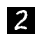

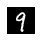

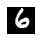

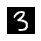

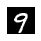

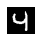

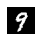

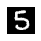

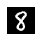

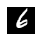

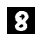

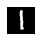

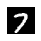

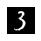

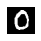

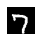

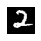

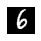

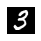

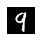

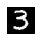

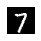

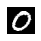

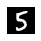

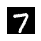

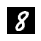

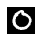

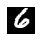

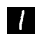

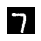

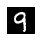

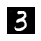

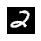

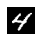

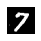

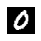

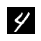

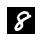

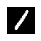

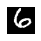

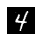

In [154]:
for image in images:
    plt.figure(figsize=(.5,.5))
    plt.axes()
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [160]:
#Input numbers shown above into this array
y_representative_digits = np.array([2,1,5,5,4,5,0,6,0,2,9,6,3,9,4,9,5,8,6,8,1,7,3,0,7,2,6,3,9,3,7,0,5,7,8,0,6,1,7,9,3,2,4,7,0,4,8,1,6,4])

In [161]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ ==i] = y_representative_digits[i]

In [162]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.7984523809523809

Going to try and propagate the labels to the 20% of the instances that are closest to the centroids to see if we can improve our score

In [163]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [164]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.7446428571428572

Well that didn't help. Lets try GridSearchCV. Note only run this once. It takes 2+ hours to run.

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=92)),
    ('log_reg', LogisticRegression()),
])
pipeline.fit(X_train, y_train)

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

........... kmeans__n_clusters=53, total=  51.0s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=  48.3s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=  47.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  52.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  50.1s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=  50.6s
[CV] kmeans__n_clusters=55 ...........................................
[CV] ............................ kmeans__n_clusters=55, total=  52.5s
[CV] kmeans__n_clusters=55 ...........................................
[CV] .......................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=92)),
    ('log_reg', LogisticRegression()),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=92)),
                ('log_reg', LogisticRegression())])

In [169]:
pipeline.score(X_test, y_test)

0.8679761904761905

In [167]:
grid_clf.best_params_

{'kmeans__n_clusters': 92}